In [1]:
import pImpactR as impact
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beam,lattice = impact.readInputFile('test_halo.in')
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test_halo.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [3]:
npt0 = 999996
nptTest = 8192

# pData at 100turn

In [4]:
pData100 = impact.readParticleData('partcl.data',ke,mass,freq) # pId=1008 is at 100 turn

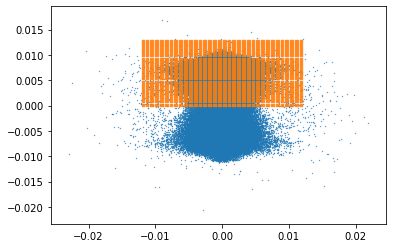

In [5]:
plt.scatter(pData100[:npt0,0],pData100[:npt0,2],s=0.1)
plt.scatter(pData100[npt0:,0],pData100[npt0:,2],s=0.2)

# pData at 200turn

In [6]:
pData200 = impact.readParticleData(7100,ke,mass,freq,2)

In [7]:
ind0 = pData200[:,-1] <= npt0+1
ind1 = pData200[:,-1] > npt0+1
np.sum(ind0),np.sum(ind1)

(999910, 8167)

# pData 100turn vs 200turn

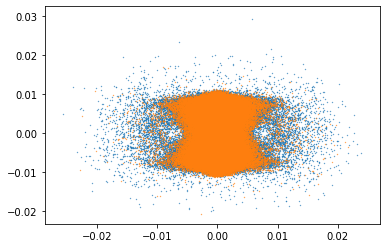

In [8]:
plt.scatter(pData200[ind0, 0],pData200[ind0, 2],s=0.1)
plt.scatter(pData100[:npt0,0],pData100[:npt0,2],s=0.1)

# TBT

In [9]:
iTBTF,TBTF = impact.readTBT(100 ,ke,mass,freq)
iTBTB,TBTB = impact.readTBT(7100,ke,mass,freq)

In [10]:
TBTB.shape

(100, 6, 8120)

In [11]:
ind = np.in1d(iTBTF,iTBTB)
TBTF = TBTF[:,:,ind]

### at t=99

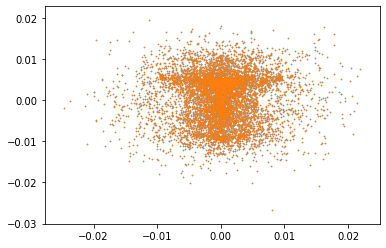

In [12]:
plt.scatter(TBTF[-1,0,:],TBTF[-1,2,:],s=0.2)
plt.scatter(TBTB [0,0,:],TBTB[ 0,2,:],s=0.2)

### at t=98

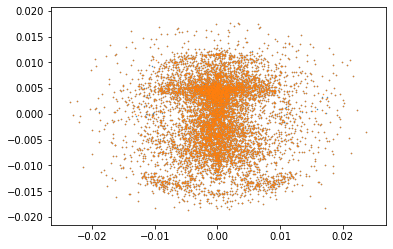

In [13]:
plt.scatter(TBTF[-2,0,:],TBTF[-2,2,:],s=0.2)
plt.scatter(TBTB [1,0,:],TBTB[ 1,2,:],s=0.2)

### at t=88

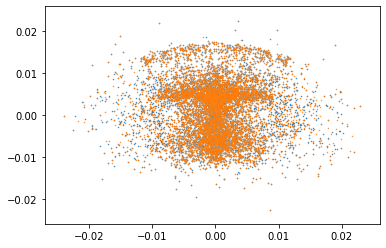

In [14]:
plt.scatter(TBTF[-12,0,:],TBTF[-12,2,:],s=0.2)
plt.scatter(TBTB [11,0,:],TBTB[ 11,2,:],s=0.2)

#### at t=48

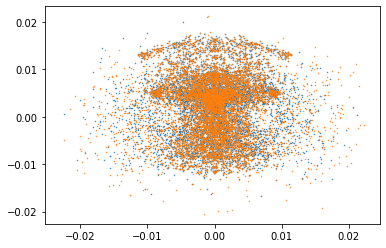

In [15]:
plt.scatter(TBTF[-52,0,:],TBTF[-52,2,:],s=0.2)
plt.scatter(TBTB [51,0,:],TBTB[ 51,2,:],s=0.2)

# Normalize

In [16]:
NL_nu = 0.3
NL_L = 1.8
NL_c = 0.01
NL_beta = 0.5*NL_L/np.tan(np.pi*NL_nu)


def normalizeTBT(TBTdata):
    TBTdata[:,0,:] = TBTdata[:,0,:]/(np.sqrt(NL_beta)*NL_c)
    TBTdata[:,1,:] = TBTdata[:,1,:]*np.sqrt(NL_beta)/NL_c
    TBTdata[:,2,:] = TBTdata[:,2,:]/(np.sqrt(NL_beta)*NL_c)
    TBTdata[:,3,:] = TBTdata[:,3,:]*np.sqrt(NL_beta)/NL_c   
    
def normalizePdata(pData):
    pData[:,0] = pData[:,0]/(np.sqrt(NL_beta)*NL_c)
    pData[:,1] = pData[:,1]*np.sqrt(NL_beta)/NL_c
    pData[:,2] = pData[:,2]/(np.sqrt(NL_beta)*NL_c)
    pData[:,3] = pData[:,3]*np.sqrt(NL_beta)/NL_c  
    

normalizeTBT(TBTF)
normalizeTBT(TBTB)
normalizePdata(pData100)

### DA plot

In [ ]:
for i in range(10):
    diff = np.log10(np.sqrt(np.sum((TBTF[-(i+1)*10,:4,:] - TBTB[(i+1)*10-1,:4,:])**2,axis=0)))

    f, axs = plt.subplots(1,2,figsize=(6.7,3), gridspec_kw={'width_ratios': [3.3,4]})
    f1=axs[0].scatter(TBTF[0,0,:], TBTF[0,2,:],c=diff,s=1.6,marker='s')
    f2=axs[0].scatter(TBTF[0,0,:],-TBTF[0,2,:],c=diff,s=1.6,marker='s')
    axs[0].set_xlim(-1,1)
    axs[0].set_ylim(-1.5,1.5)
    axs[0].set_xlabel('$x_n$')
    axs[0].set_ylabel('$y_n$')

    axs[1].scatter(TBTF[0,0,:], TBTF[0,2,:],c=diff,s=1.6,marker='s')
    axs[1].scatter(TBTF[0,0,:],-TBTF[0,2,:],c=diff,s=1.6,marker='s')
    axs[1].scatter(pData100[:npt0,0],pData100[:npt0,2],color='r',s=0.2)
    axs[1].set_xlim(-1,1)
    axs[1].set_ylim(-1.5,1.5)
    axs[1].set_xlabel('$x_n$')

    plt.colorbar(f1)
    plt.tight_layout()

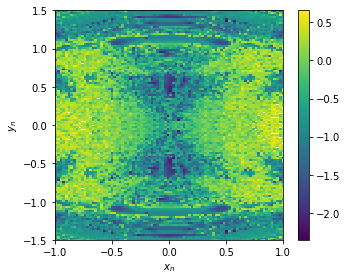

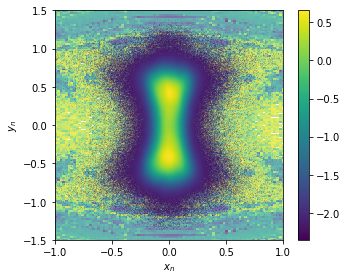

In [22]:
i=9
ms = 3.5
diff = np.log10(np.sqrt(np.sum((TBTF[-(i+1)*10,:4,:] - TBTB[(i+1)*10-1,:4,:])**2,axis=0)))

plt.figure(figsize=(4.94,4))
f1 = plt.scatter(TBTF[0,0,:], TBTF[0,2,:],c=diff,s=ms,marker='s')
plt.scatter(TBTF[0,0,:],-TBTF[0,2,:],c=diff,s=ms,marker='s')
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.colorbar(f1)
plt.tight_layout()
plt.savefig('REM_IOTA_8mA.png',dpi=180)


plt.figure(figsize=(4.94,4))
plt.scatter(TBTF[0,0,:], TBTF[0,2,:],c=diff,s=ms,marker='s')
plt.scatter(TBTF[0,0,:],-TBTF[0,2,:],c=diff,s=ms,marker='s')
plt.scatter(0,0,c='white',alpha=0.3,s=1000000)
impact.plot.density(pData100[:npt0,0],pData100[:npt0,2],samplePeriod=10,mksize=0.2)
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.colorbar(f1)
plt.tight_layout()
plt.savefig('REM_IOTA_8mA_wBeam.png',dpi=180)